## Grafos arcos circulares

<b>Definición.</b> Un grafo arco circular es el grafo de intersección de un conjunto de arcos de circunferencia.

Dado un modelo de arcos, para construir el grafo arco circular asociado se agrega un vértice por cada arco del modelo y una arista entre todo par de vértices cuyos arcos correspondientes se intersectan en la circunferencia. Ver <a href="https://en.wikipedia.org/wiki/Circular-arc_graph#/media/File:Circular-arc_graph.svg">ejemplo</a>.

Existen muchas maneras de representar un modelo de arcos. Usaremos la que se explica a continuación.

Podemos pensar que la circunferencia representa medio día (12 horas, como si fuese un reloj analógico) y que los arcos representan intervalos de tiempo. Por ejemplo, podemos pensar en el arco $[10$:$00,11$:$30]$ o también en el arco $[10$:$45,2$:$50]$. Notar que el segundo ejemplo "da la vuelta" al pasar por el $0$:$00$.

Por simplicidad, en lugar de trabajar con horas, minutos y segundos, usaremos horas decimales en el intervalo $[0,12)$. Y a los arcos los representaremos con una tupla de Python con dos horas decimales. Así, el arco $[10$:$00,11$:$30]$ se representa como $(10,11.5)$ y el arco $[10$:$45,2$:$50]$ con $(10.75,2.83)$.

También por simplicidad no vamos a permitir tuplas de la forma $(i,f)$ con $i=f$. En consecuencia, no podremos representar arcos triviales (formados por un único punto o por la circunferencia completa). En caso de trabajar con intervalos triviales, se deberá ajustar de forma acorde el material propuesto en este notebook.

Notar que en nuestras tuplas $(i,f)$ puede ocurrir $i < f$ (<b>tipo 1</b>) o $f > i$ (<b>tipo 2</b>). Además, los intervalos de tipo 2 se pueden descomponer en dos intervalos de tipo 1: $(i,11.\overline{9})$ y $(0,f)$.

Por lo tanto, podemos definir una función <code>construir_arco_circular(arcos)</code> que tome una lista de arcos y devuelva su grafo arco circular asociado. Para poder definirla, necesitaremos previamente una función <code>hay_interseccion(i1,f1,i2,f2)</code> que determine cuando dos arcos <code>(i1,f1)</code> y <code>(i2,f2)</code> se intersectan.

Una forma sencilla de chequear si dos arcos $(i_1,f_1)$ y $(i_2,f_2)$ ambos de tipo 1 se intersectan es mediante el siguiente predicado (pensar algunos ejemplos para convencerse):

$$ i_1 \leq f_2 \wedge i_2 \leq f_1 $$

Lamentablemente, en nuestro caso vamos a tener que contemplar los casos restantes.

* Si ambos son de tipo 2, entonces siempre se entersectan porque ambos contienen al 0.
* Si $(i_1,f_1)$ es de tipo 1 y $(i_2,f_2)$ es de tipo 2, entonces podemos descomponer a $(i_2,f_2)$ en los arcos $(i_2,11.\overline{9})$ y $(0,f_2)$ ambos de tipo 1. Luego podemos chequear si $(i_1,f_1)$ se intersecta con alguno de ellos mediante el predicado que aprendimos más arriba.

Entonces, empecemos definiendo una función <code>hay_interseccion_1_1(i1,f1,i2,f2)</code> que asume que ambos arcos son de tipo 1:

In [54]:
def hay_interseccion_1_1(i1,f1,i2,f2):
    return i1 <= f2 and i2 <= f1

Y algunos casos de prueba:

In [55]:
assert hay_interseccion_1_1(2,6,5,9) == True
assert hay_interseccion_1_1(2,6,1,3) == True
assert hay_interseccion_1_1(2,6,7,9) == False
assert hay_interseccion_1_1(7,9,2,6) == False

Ahora vamos a definir una función <code>hay_interseccion_1_2(i1,f1,i2,f2)</code> que asume que el primer arco es de tipo 1 y el segundo es de tipo 2:

In [56]:
def hay_interseccion_1_2(i1,f1,i2,f2):    
    return hay_interseccion_1_1(i1,f1,i2,12) or hay_interseccion_1_1(i1,f1,0,f2)

Y algunos casos de prueba:

In [57]:
assert hay_interseccion_1_2(2,6,9,3) == True
assert hay_interseccion_1_2(2,6,9,8) == True
assert hay_interseccion_1_2(2,6,11,1) == False

No vamos a definir una función <code>hay_interseccion_2_1</code> que asume que el primer arco es de tipo 2 y el segundo es de tipo 1, sino que llamaremos a la anterior con los argumentos intercambiados.

Ahora si ya tenemos todo listo para definir <code>hay_interseccion(i1,f1,i2,f2)</code> que identifique el tipo de arcos y se comporte de forma adecuada.

In [58]:
def hay_interseccion(i1,f1,i2,f2):
    if i1 < f1 and i2 < f2: # Caso tipo 1 y tipo 1
        return hay_interseccion_1_1(i1,f1,i2,f2)
    elif i1 < f1 and i2 > f2: # Caso tipo 1 y tipo 2
        return hay_interseccion_1_2(i1,f1,i2,f2)
    elif i1 > f1 and i2 < f2: # Caso tipo 2 y tipo 1
        return hay_interseccion_1_2(i2,f2,i1,f1)
    else: # Caso tipo 2 y tipo 2
        return True

Y sus casos de prueba:

In [59]:
assert hay_interseccion(2,6,1,3) == True
assert hay_interseccion(10,4,11,1) == True
assert hay_interseccion(11,5,8,10) == False
assert hay_interseccion(11,5,4,10) == True

Listo, ya tenemos todo listo para definir la función <code>construir_arco_circular(arcos)</code>. Podemos considerar que <code>arcos</code> es una lista de tuplas con los arcos que queremos considerar. Por ejemplo, para el siguiente <a href="https://en.wikipedia.org/wiki/Circular-arc_graph#/media/File:Circular-arc_graph.svg">ejemplo</a> los arcos de circunferencia podrían ser (mas o menos) los siguientes:

$$A: (5.5,8.5)$$
$$B: (6.5,10.5)$$
$$C: (9.5,0.5)$$
$$D: (11.5,2.5)$$
$$E: (1.5,4.5)$$
$$F: (3.5,7.5)$$

In [45]:
arcos1 = [(5.5,8.5), (6.5,10.5), (9.5,0.5), (11.5,2.5), (1.5,4.5), (3.5,7.5)]

La idea para definir <code>construir_arco_circular(arcos)</code> es considerar un vértice por cada arco de <code>arcos</code> y luego recorrer todos los pares de arcos de <code>arcos</code> y agregar una arista entre los respectivos vértices si los arcos tienen intersección. 

Podemos aprovechar un truco de Python para iterar simultáneamente sobre los los índices y los elementos de una lista:

<code>for j, arco in enumerate(arcos):</code> 

donde <code>j</code> es el índice y <code>arco</code> es el elemento de la lista, en nuestro caso, una tupla que representa el arco. Iteremos e imprimamos estas variables para ver lo que pasa.  

In [60]:
for j, arco in enumerate(arcos1):
    print(j,": ",arco)

0 :  (5.5, 8.5)
1 :  (6.5, 10.5)
2 :  (9.5, 0.5)
3 :  (11.5, 2.5)
4 :  (1.5, 4.5)
5 :  (3.5, 7.5)


Por lo tanto, podemos usar a los índices como el nombre de los vértices. Por ejemplo $(5.5, 8.5)$ se representa con el vértice 0, $(6.5, 10.5)$ con 1, y así sucesivamente. 

Además, Python nos deja desarmar la tupla para tener a sus componentes de forma más directa:

In [61]:
for j, (i, f) in enumerate(arcos1):
    print(i,": ",j,", ",f)

5.5 :  0 ,  8.5
6.5 :  1 ,  10.5
9.5 :  2 ,  0.5
11.5 :  3 ,  2.5
1.5 :  4 ,  4.5
3.5 :  5 ,  7.5


Con este truco, ya estamos en condiciones de definir nuestra función.

In [62]:
import networkx as nx

def construir_arco_circular(arcos):
    G = nx.Graph() # Inicializamos un grafo vacio
    for j1, (i1,f1) in enumerate(arcos):
        for j2, (i2,f2) in enumerate(arcos):
            if (j1 < j2 # Control para evitar agregar bucles y aristas por duplicado 
                and hay_interseccion(i1,f1,i2,f2)): # Los arcos se intersectan
                G.add_edge(j1,j2)
    return G

Probemos nuestra función:

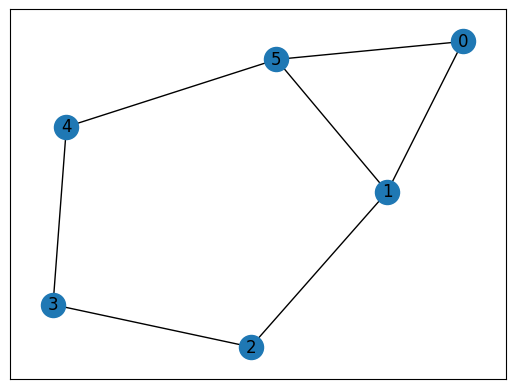

In [63]:
G = construir_arco_circular(arcos1)
nx.draw_networkx(G)

### &#x1f4bb;  Actividad 1

Usar la función <code>construir_arco_circular</code> que definimos para construir el grafo arco circular del siguiente <a href="https://images.app.goo.gl/pzwN7hERDhGDp6we9">ejemplo</a>.

In [52]:
# Celda para resolver Actividad 1

### &#x1f4bb;  Actividad 2

<b>Definición.</b> Un grafo de intervalo es el grafo de intersección de un conjunto de intervalos en la recta numérica.

Dado un modelo de intervalos, para construir el grafo de intervalo asociado se agrega un vértice por cada intervalo del modelo y una arista entre todo par de vértices cuyos intervalos correspondientes se intersecten en la recta. Ver <a href="https://en.wikipedia.org/wiki/Interval_graph#/media/File:Interval_graph.svg">ejemplo</a>.

Implementar una función <code>construir_de_intervalo(intervalos)</code> que toma una lista de intervalos (cada intervalo se puede representar con una tupla de 2 números) y retorna el grafo de intervalo asociado.

In [ ]:
# Celda para resolver Actividad 2